In [1]:
import openslide
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import json
import os
from tqdm import tqdm
from torchvision import transforms

In [4]:
ORIPATH = '/data/images/pathology/temp/Qingdao/'
slidelist = []
spathlist = os.listdir('results')
for spath in spathlist:
    if spath.split('.')[1] == 'xml':
        slidelist.append(spath.split('.')[0])

In [5]:
len(slidelist)

163

In [23]:
slide.properties

<_PropertyMap {'mirax.DATAFILE.FILE_0': 'Data0000.dat', 'mirax.DATAFILE.FILE_1': 'Data0001.dat', 'mirax.DATAFILE.FILE_10': 'Data0010.dat', 'mirax.DATAFILE.FILE_11': 'Data0011.dat', 'mirax.DATAFILE.FILE_12': 'Data0012.dat', 'mirax.DATAFILE.FILE_13': 'Data0013.dat', 'mirax.DATAFILE.FILE_14': 'Data0014.dat', 'mirax.DATAFILE.FILE_15': 'Data0015.dat', 'mirax.DATAFILE.FILE_16': 'Data0016.dat', 'mirax.DATAFILE.FILE_17': 'Data0017.dat', 'mirax.DATAFILE.FILE_18': 'Data0018.dat', 'mirax.DATAFILE.FILE_19': 'Data0019.dat', 'mirax.DATAFILE.FILE_2': 'Data0002.dat', 'mirax.DATAFILE.FILE_20': 'Data0020.dat', 'mirax.DATAFILE.FILE_21': 'Data0021.dat', 'mirax.DATAFILE.FILE_22': 'Data0022.dat', 'mirax.DATAFILE.FILE_3': 'Data0003.dat', 'mirax.DATAFILE.FILE_4': 'Data0004.dat', 'mirax.DATAFILE.FILE_5': 'Data0005.dat', 'mirax.DATAFILE.FILE_6': 'Data0006.dat', 'mirax.DATAFILE.FILE_7': 'Data0007.dat', 'mirax.DATAFILE.FILE_8': 'Data0008.dat', 'mirax.DATAFILE.FILE_9': 'Data0009.dat', 'mirax.DATAFILE.FILE_COUNT': 

In [6]:
slide_mpp = []
for fp in tqdm(slidelist):
    filepath = ORIPATH + fp + '/' + fp +'.mrxs'
    slide = openslide.OpenSlide(filepath)
    mpp_x = slide.properties['openslide.mpp-x']
    mpp_y = slide.properties['openslide.mpp-y']
    mpp = [fp,mpp_x,mpp_y]
    slide_mpp.append(mpp)

100%|██████████| 163/163 [01:16<00:00,  2.14it/s]


In [7]:
slide_mpp

[['201612290-4', '0.17546754675467499', '0.17575187969924799'],
 ['201624414-1', '0.17546754675467499', '0.17575187969924799'],
 ['201604335-3', '0.17546754675467499', '0.17575187969924799'],
 ['201605479-1', '0.17546754675467499', '0.17575187969924799'],
 ['201612290-3', '0.17546754675467499', '0.17575187969924799'],
 ['201625946-2', '0.17546754675467499', '0.17575187969924799'],
 ['201624650-1', '0.17546754675467499', '0.17575187969924799'],
 ['17-046476-2', '0.17546754675467499', '0.17575187969924799'],
 ['201601684-1', '0.17546754675467499', '0.17575187969924799'],
 ['201434013-4', '0.137316712040885', '0.137316712040885'],
 ['201600666-5', '0.17546754675467499', '0.17575187969924799'],
 ['201434013-3', '0.137316712040885', '0.137316712040885'],
 ['201600623-1', '0.17546754675467499', '0.17575187969924799'],
 ['201439629-2', '0.137316712040885', '0.137316712040885'],
 ['201439203-1', '0.137316712040885', '0.137316712040885'],
 ['201601986-2', '0.17546754675467499', '0.1757518796992

In [8]:
mpp = np.array(slide_mpp)[:,1:]
mpp = mpp.astype(np.float)

In [9]:
mpp_3 = mpp*2**3
mpp_2 = mpp*2**2
mpp_0 = mpp/0.2

In [10]:
rate_0 = {}
for i in range(len(slide_mpp)):
    rate_0[slide_mpp[i][0]] = mpp_0[i].tolist()

In [11]:
rate_3 = {}
for i in range(len(slide_mpp)):
    rate_3[slide_mpp[i][0]] = mpp_3[i].tolist()

In [12]:
rate_2 = {}
for i in range(len(slide_mpp)):
    rate_2[slide_mpp[i][0]] = mpp_2[i].tolist()

In [13]:
rate_2

{'201612290-4': [0.7018701870187, 0.703007518796992],
 '201624414-1': [0.7018701870187, 0.703007518796992],
 '201604335-3': [0.7018701870187, 0.703007518796992],
 '201605479-1': [0.7018701870187, 0.703007518796992],
 '201612290-3': [0.7018701870187, 0.703007518796992],
 '201625946-2': [0.7018701870187, 0.703007518796992],
 '201624650-1': [0.7018701870187, 0.703007518796992],
 '201601684-1': [0.7018701870187, 0.703007518796992],
 '201434013-4': [0.54926684816354, 0.54926684816354],
 '201600666-5': [0.7018701870187, 0.703007518796992],
 '201434013-3': [0.54926684816354, 0.54926684816354],
 '201600623-1': [0.7018701870187, 0.703007518796992],
 '201439629-2': [0.54926684816354, 0.54926684816354],
 '201439203-1': [0.54926684816354, 0.54926684816354],
 '201601986-2': [0.7018701870187, 0.703007518796992],
 '201604045-4': [1.403740374037404, 1.406015037593984],
 '201603916-1': [0.7018701870187, 0.703007518796992],
 '201604045-3': [0.7018701870187, 0.703007518796992],
 '201438360-1': [0.5492668

In [13]:
## save rate
ratepath = 'rate_lv2_1mpp2.json'
with open(ratepath,'w') as f:
    json.dump(rate_2,f)

In [ ]:
ratepath = 'rate_lv2_1mpp2.json'
with open(ratepath,'w') as f:
    json.dump(rate_2,f)

In [15]:
ratepath = 'rate_lv3_1mpp.json'
with open(ratepath,'w') as f:
    json.dump(rate_3,f)

In [16]:
ratepath = 'rate_lv0_02mpp.json'
with open(ratepath,'w') as f:
    json.dump(rate_0,f)

In [103]:
rate_0

{'201604335-3': [0.8773377337733749, 0.87875939849624],
 '201605479-1': [0.8773377337733749, 0.87875939849624],
 '201601684-1': [0.8773377337733749, 0.87875939849624],
 '201434013-4': [0.6865835602044249, 0.6865835602044249],
 '201600666-5': [0.8773377337733749, 0.87875939849624],
 '201434013-3': [0.6865835602044249, 0.6865835602044249],
 '201600623-1': [0.8773377337733749, 0.87875939849624],
 '201601986-2': [0.8773377337733749, 0.87875939849624],
 '201604045-4': [1.7546754675467549, 1.75751879699248],
 '201603916-1': [0.8773377337733749, 0.87875939849624],
 '201604045-3': [0.8773377337733749, 0.87875939849624],
 '201438360-1': [0.6865835602044249, 0.6865835602044249],
 '201609207-5': [0.8773377337733749, 0.87875939849624],
 '201602454-1': [0.8773377337733749, 0.87875939849624],
 '201608537-2': [0.8773377337733749, 0.87875939849624],
 '201609207-2': [0.8773377337733749, 0.87875939849624],
 '201530023-7': [0.8773377337733749, 0.87875939849624],
 '201609810-1': [0.8773377337733749, 0.878

In [10]:
ORIPATH = '/data/images/pathology/temp/Qingdao'
path = ORIPATH+ '/'+ '201605479-1'+'/'+'201605479-1.mrxs'
slide = openslide.OpenSlide(path)

In [11]:
rate = rate_3['201605479-1']

In [27]:
slide.level_dimensions[6]

(2006, 4468)

In [44]:
(int(512*rate[0]),int(512*rate[1]))

(718, 719)

In [12]:
slide1 = '201604335-3'
slide2 = '201604045-4'

In [13]:
filepath

'/data/images/pathology/temp/Qingdao/201436453-3/201436453-3.mrxs'

In [16]:
filepath = ORIPATH + slide1 + '/' + slide1+'.mrxs'
slide = openslide.OpenSlide(filepath)

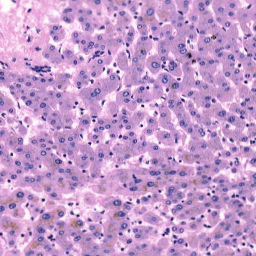

In [17]:
image = slide.read_region((34359,153567),3,(256,256))
image

In [18]:
filepath = ORIPATH + slide2 + '/' + slide2+'.mrxs'
slide2img = openslide.OpenSlide(filepath)
image = slide2img.read_region((24359,73567),3,(256,256))

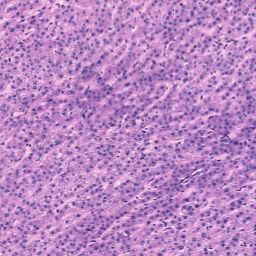

In [19]:
image

In [22]:
rate1 = rate_2[slide1]
rate2 = rate_2[slide2]

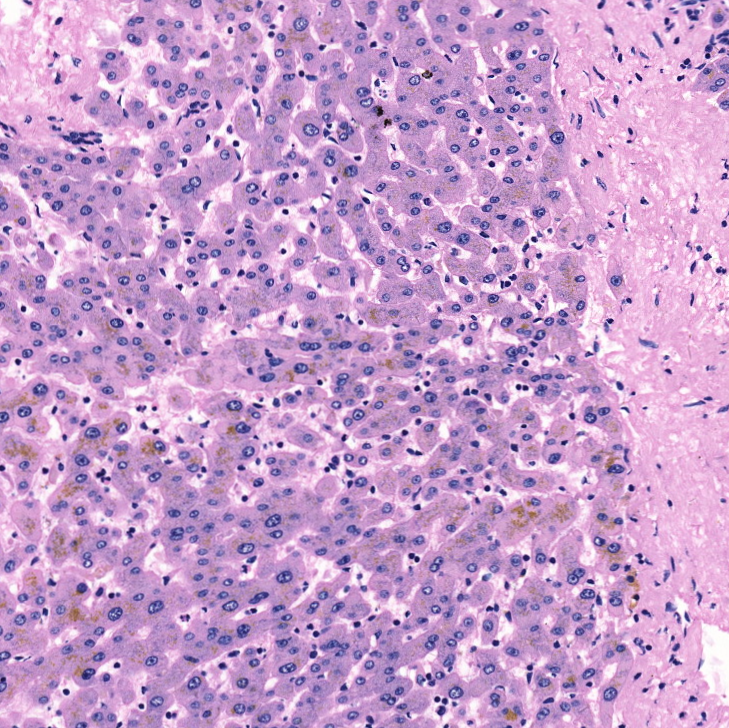

In [32]:
image1 = slide.read_region((34359,153567),2,(int(512/rate1[0]),int(512/rate1[1])))
image1

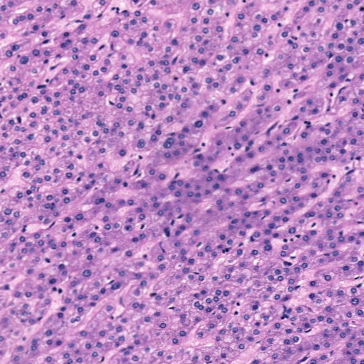

In [33]:
image2 = slide2img.read_region((24359,73567),2,(int(512/rate2[0]),int(512/rate2[1])))
image2

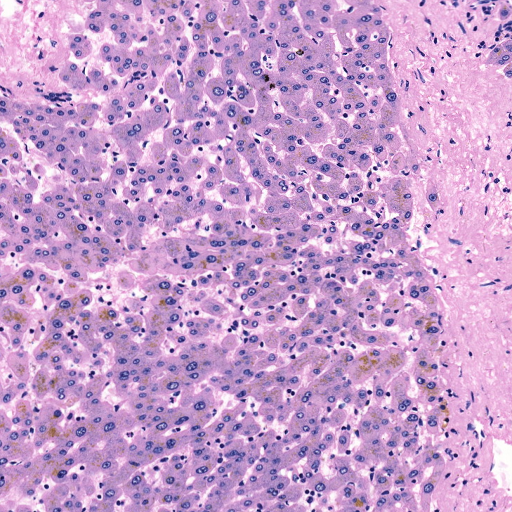

In [34]:
img1_pro = cv2.resize(np.array(image1),dsize=(512,512),interpolation=cv2.INTER_CUBIC)
Image.fromarray(img1_pro)

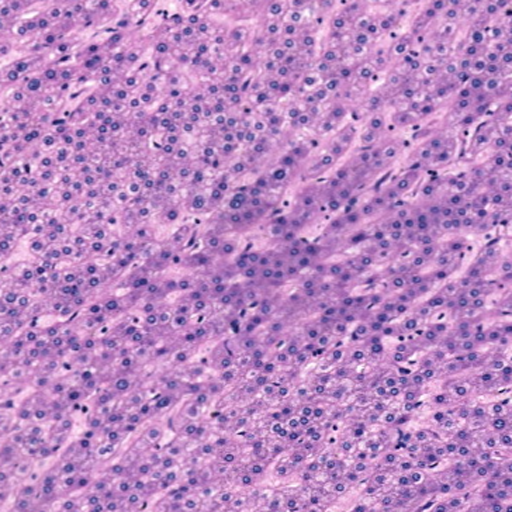

In [35]:
img2_pro = cv2.resize(np.array(image2),dsize=(512,512),interpolation=cv2.INTER_CUBIC)
Image.fromarray(img2_pro)

In [120]:
img.save('try.png')

In [121]:
ig = Image.open('try.png')
ig = np.array(ig)

In [122]:
ig.shape

(512, 512, 3)